In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
y=pd.DataFrame(housing.target,columns=housing.target_names)
X=pd.DataFrame(housing.data,columns=housing.feature_names)

In [13]:
X.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [14]:
y.head(3)

,MedHouseVal
0,4.526
1,3.585
2,3.521


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
alpha = 0.1  # Regularization strength
lasso = Lasso(alpha=alpha)

In [18]:
# Fit the model
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Print the coefficients
print('\nCoefficients:')
for feature, coef in zip(housing.feature_names, lasso.coef_):
    print(f'{feature}: {coef:.2f}')

Mean Squared Error: 0.68
R^2 Score: 0.48

Coefficients:
MedInc: 0.71
HouseAge: 0.11
AveRooms: -0.00
AveBedrms: 0.00
Population: -0.00
AveOccup: -0.00
Latitude: -0.01
Longitude: -0.00


In [23]:
coefficients = lasso.coef_
feature_names = housing.feature_names

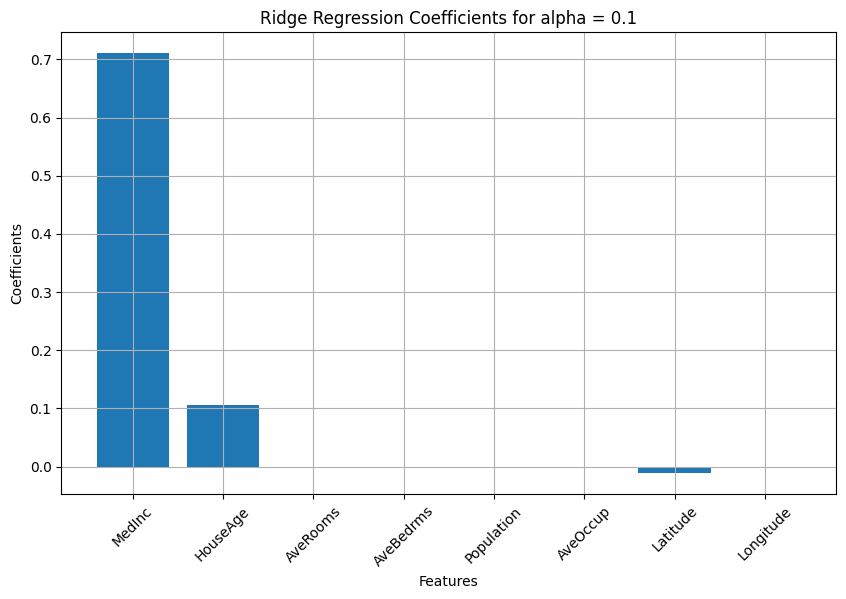

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(coefficients)), coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title(f'Ridge Regression Coefficients for alpha = {alpha}')
plt.xticks(ticks=np.arange(len(coefficients)), labels=feature_names, rotation=45)
plt.grid(True)
plt.show()